# Seminário: Aplicação do Algoritmo SVM

Este notebook apresenta um experimento prático utilizando o algoritmo Support Vector Machine (SVM) para classificação, seguindo o roteiro proposto no seminário.

## 1. Fundamentos Teóricos

O SVM é um algoritmo de aprendizado supervisionado utilizado principalmente para problemas de classificação. Ele busca encontrar o hiperplano que melhor separa as classes, maximizando a margem entre elas. Para dados não linearmente separáveis, utiliza funções kernel para projetar os dados em um espaço de maior dimensão.

## 2. Importação das Bibliotecas Necessárias

In [1]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

## 3. Carregamento e Análise do Dataset

Utilizaremos o Wisconsin Breast Cancer Dataset, disponível no UCI Machine Learning Repository.

In [2]:
# Carregamento do dataset Breast Cancer Wisconsin (Diagnostic) diretamente do repositório UCI
uci_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
colunas = [
    'id', 'diagnosis',
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
    'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se',
    'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]
df = pd.read_csv(uci_url, header=None, names=colunas)

# Features e target
X = df.iloc[:, 2:]
y = df['diagnosis']

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Descrição do Dataset
- Problema: Classificação entre tumores benignos e malignos.
- Variáveis: 30 características numéricas extraídas de imagens digitalizadas.

In [3]:
# Informações gerais sobre o dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## 4. Pré-processamento dos Dados
- Tratamento de dados faltantes
- Normalização dos dados com StandardScaler

In [4]:
# Verificando dados faltantes
df.isnull().sum()

# Removendo colunas desnecessárias (ID)
df = df.drop(['id', 'Unnamed: 32'], axis=1, errors='ignore')

# Separando features e target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis'].map({'M': 1, 'B': 0})

# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 5. Divisão do Dataset
- Treinamento (80%) e Teste (20%)
- Validação cruzada com k-fold

In [5]:
# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## 6. Treinamento do Modelo SVM
- Kernel RBF
- Ajuste dos hiperparâmetros com GridSearchCV (C e gamma)

In [6]:
# Definindo os parâmetros para GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)

Melhores parâmetros: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


## 7. Avaliação do Modelo
- Acurácia
- Matriz de confusão
- Precisão, Recall, F1-score
- AUC-ROC

In [7]:
# Avaliação no conjunto de teste
y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, grid.decision_function(X_test))

print(f"Acurácia: {accuracy:.4f}")
print("Matriz de Confusão:\n", cm)
print("Relatório de Classificação:\n", report)
print(f"AUC-ROC: {roc_auc:.4f}")

Acurácia: 0.9561
Matriz de Confusão:
 [[70  2]
 [ 3 39]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

AUC-ROC: 0.9931


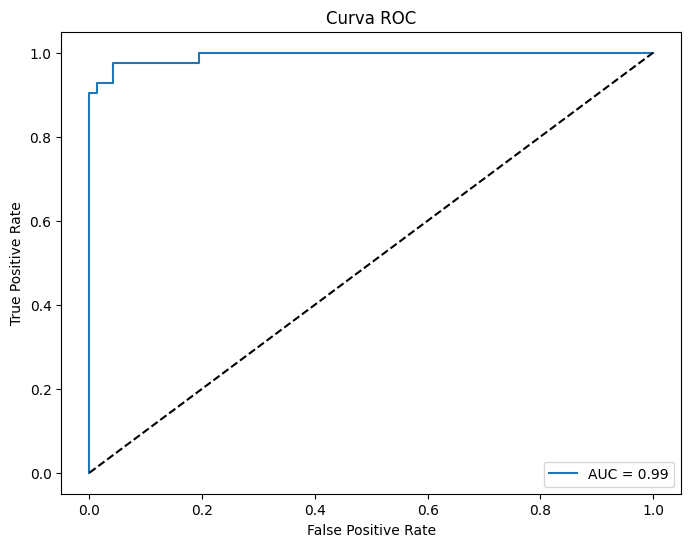

In [8]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, grid.decision_function(X_test))
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

## 8. Discussão dos Resultados

- O kernel RBF apresentou boa performance na separação das classes.
- O ajuste dos hiperparâmetros C e gamma foi fundamental para o desempenho.
- O modelo apresentou alta acurácia e AUC-ROC, indicando boa capacidade de generalização.
- Possíveis melhorias incluem testar outros kernels e realizar ajustes mais finos nos hiperparâmetros.

## 9. Referências
- UCI Machine Learning Repository: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
- Scikit-learn: Support Vector Machines: https://scikit-learn.org/stable/modules/svm.html
- DataCamp: Tutorial de Vetor de Suporte com o Scikit-learn: https://www.datacamp.com/pt/tutorial/svm-classification-scikit-learn-python
- IBM: Tutorial Prático sobre SVM com Kernel RBF: https://www.ibm.com/think/topics/support-vector-machine
- Support Vector Machines: Theory and Applications: https://www.researchgate.net/publication/221621494_Support_Vector_Machines_Theory_and_Applications